# ToDo besok:
- [ ] Lanjutin preprocessing
- [ ] Rapikan code nya
- [ ] Buat pickle buat preprocessing nya
- [ ] Modeling

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
wrn.filterwarnings("ignore")

### Read Data 

In [222]:
DATA_PATH = 'data/'

In [223]:
def read_data(filename):
    data = pd.read_csv(DATA_PATH + filename)
    
    return data

#### Data Train 

In [224]:
data_train = read_data("train.csv")
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [225]:
data_train.shape

(103904, 25)

In [226]:
data_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [227]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [228]:
data_train.duplicated().sum()

0

In [229]:
data_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

#### Data Test 

In [230]:
data_test = read_data("test.csv")
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [231]:
data_test.shape

(25976, 25)

In [232]:
data_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [233]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [234]:
data_test.duplicated().sum()

0

In [235]:
data_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


### Drop unnecessary column 

In [236]:
def drop_columns(data, columns):
    data = data.drop(columns, axis=1).copy()
    
    return data

In [237]:
data_train = drop_columns(data = data_train,
                          columns = ["Unnamed: 0", "id"])

In [238]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [239]:
data_test = drop_columns(data = data_test,
                          columns = ["Unnamed: 0", "id"])

In [240]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### Data Splitting 

In [241]:
TARGET_COL = "satisfaction"

In [242]:
X_train = data_train.drop([TARGET_COL], axis=1).copy() 
X_test = data_test.drop([TARGET_COL], axis=1).copy() 
y_train = data_train[TARGET_COL]
y_test = data_test[TARGET_COL]

In [243]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [244]:
y_train.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [245]:
y_test.value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

### Split into Numerical and Categorical Data

Di proses ini sebenernya bisa aja langsung di filter columns nya

In [246]:
def split_num_cat(data, option):
    if option.lower() == "numerical":
        data = data.select_dtypes(include=np.number).copy()
        
    elif option.lower() == "categorical":
        data = data.select_dtypes(exclude=np.number).copy()
        
    else:
        raise Exception("Invalid option")
        
    return data

In [247]:
X_train_cat = split_num_cat(data = X_train,
                            option = "categorical")
X_train_num = split_num_cat(data = X_train,
                            option = "numerical")

In [248]:
X_train_cat.head()

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business


In [249]:
X_train_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [250]:
X_test_cat = split_num_cat(data = X_test,
                            option = "categorical")
X_test_num = split_num_cat(data = X_test,
                            option = "numerical")

In [251]:
X_test_cat.head()

,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Male,disloyal Customer,Business travel,Eco
3,Male,Loyal Customer,Business travel,Business
4,Female,Loyal Customer,Business travel,Eco


In [252]:
X_test_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


### EDA 

In [253]:
def distribution_plot(column):
    plt.figure(figsize=(10, 9))
    plt.title(f"{column} Data Distribution")
    sns.distplot(X_train_num[column])

In [254]:
def count_plot(column):
    plt.figure(figsize=(10,9))
    plt.title(f"{column} Count Plot")
    ax = sns.countplot(X_train_cat, x=column, alpha=0.8, order = X_train_cat[column].value_counts().index)
    ax.bar_label(ax.containers[0])

In [255]:
CAT_COLS = X_train_cat.columns.tolist()

NUM_COLS = X_train_num.columns.tolist()

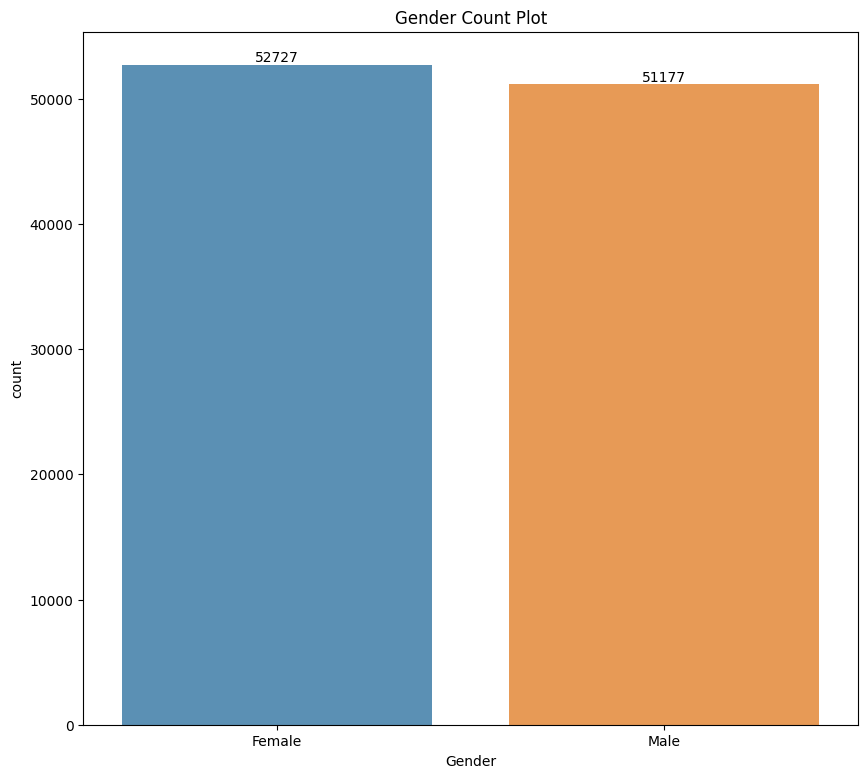

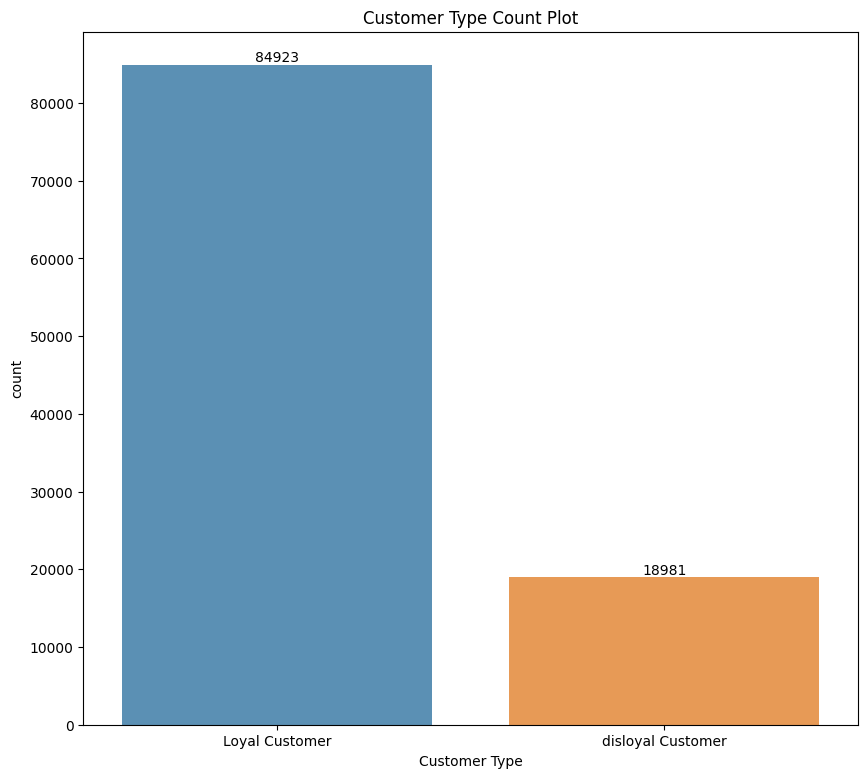

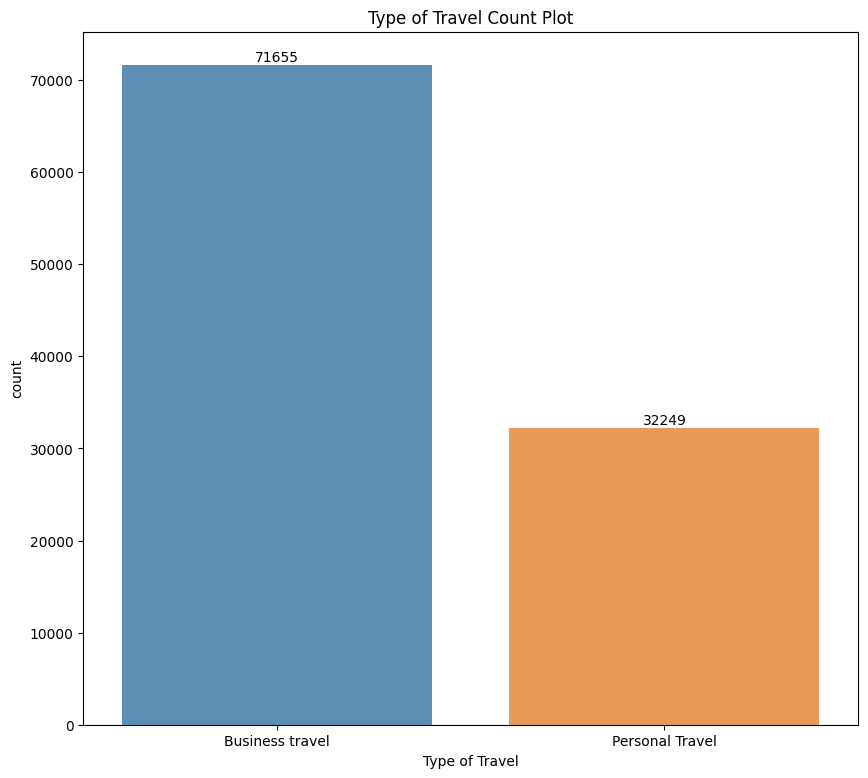

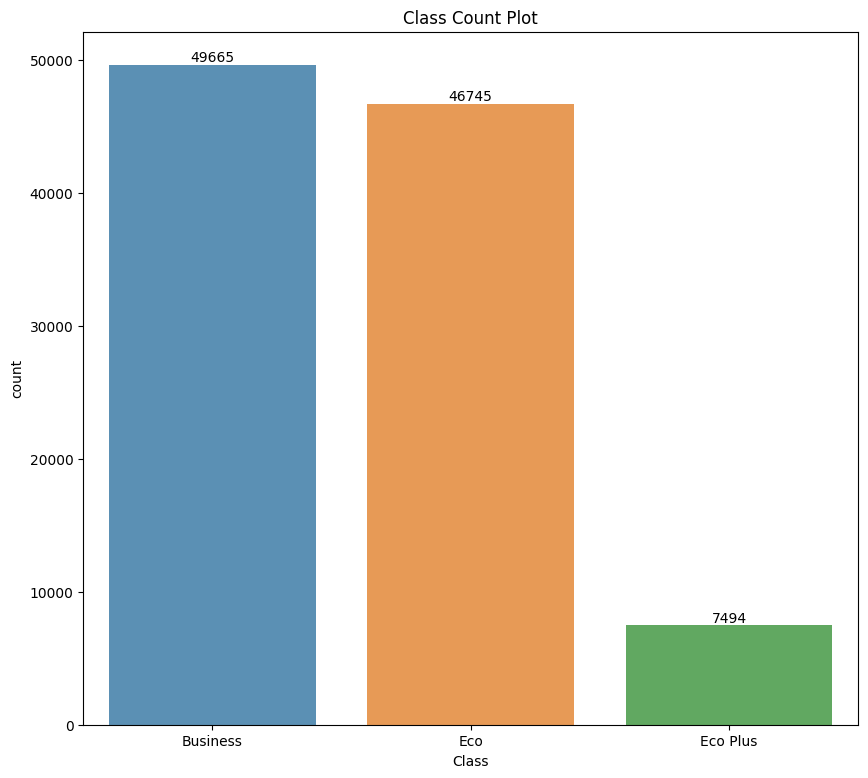

In [256]:
for cat_col in CAT_COLS:
    count_plot(cat_col)

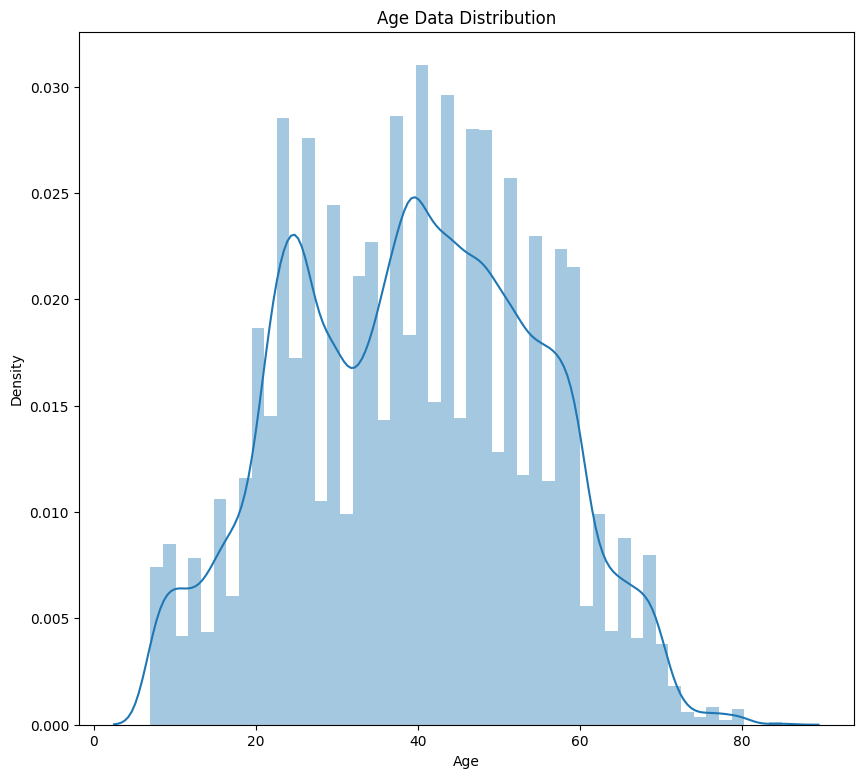

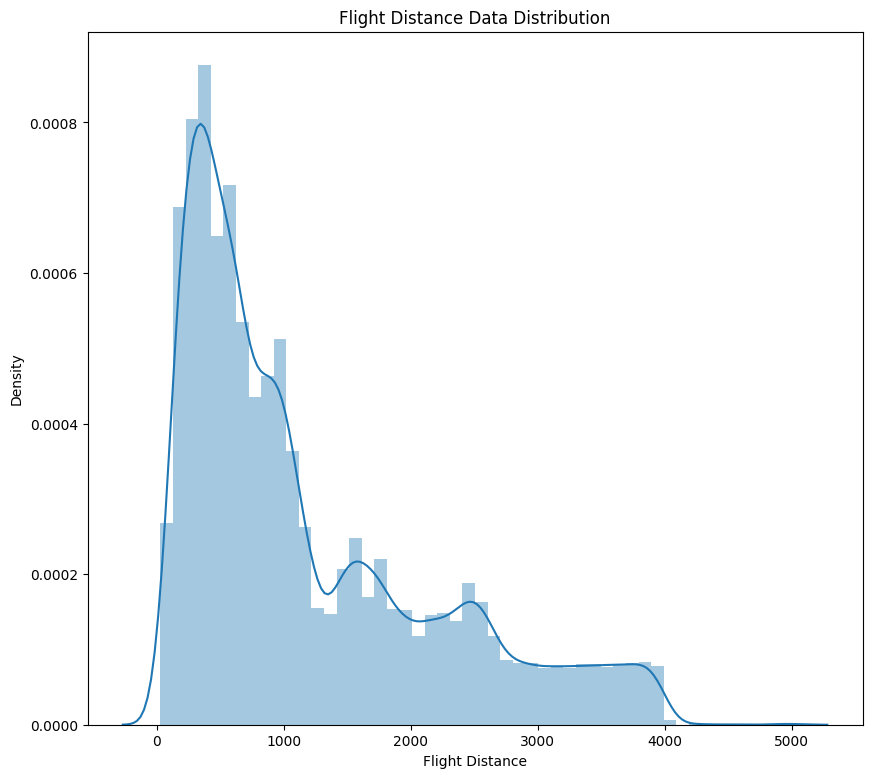

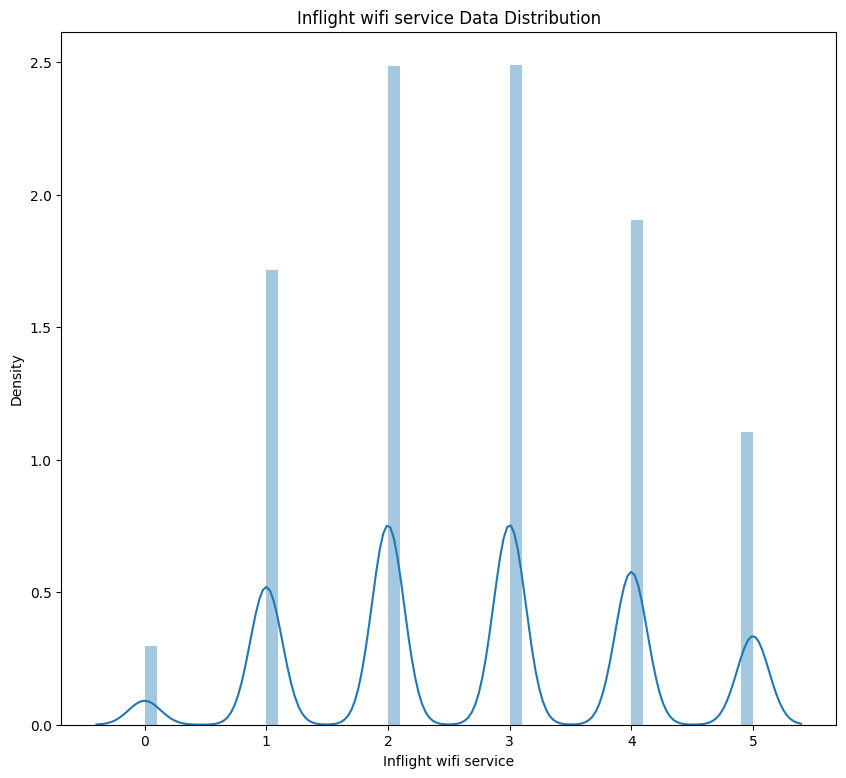

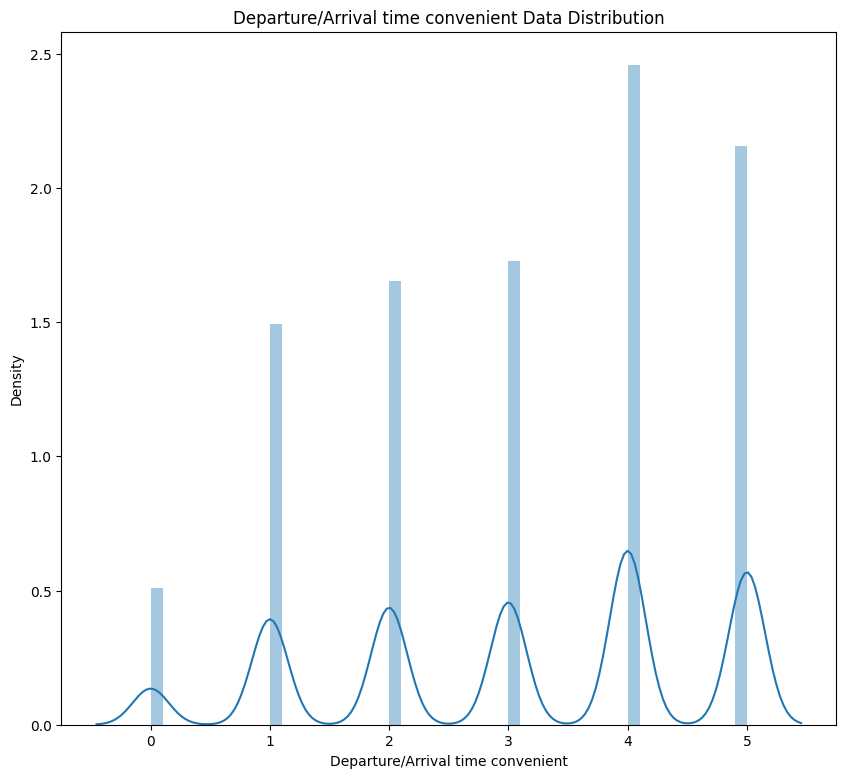

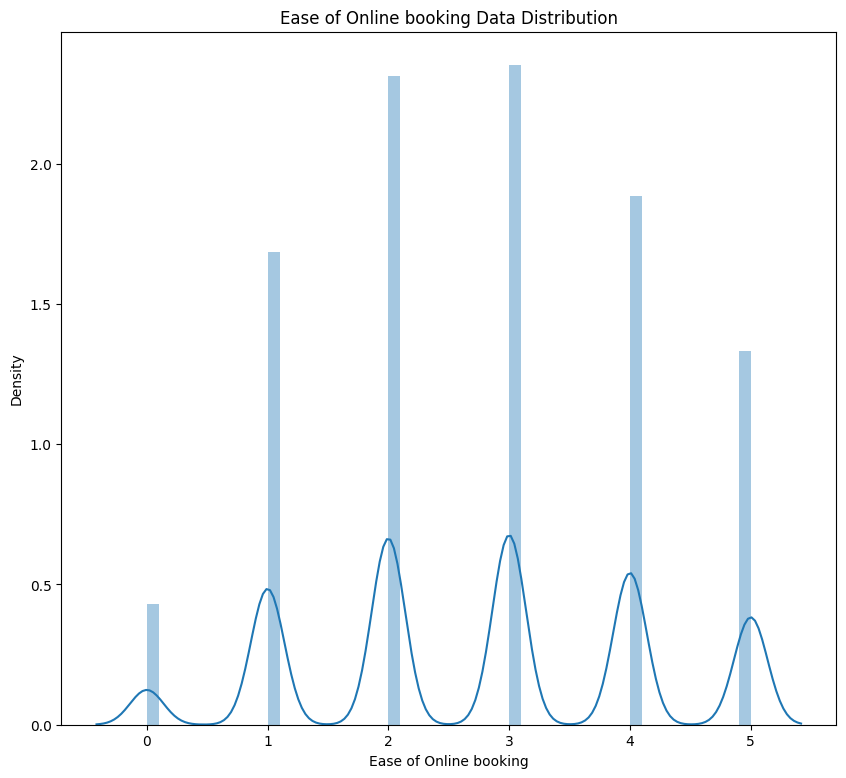

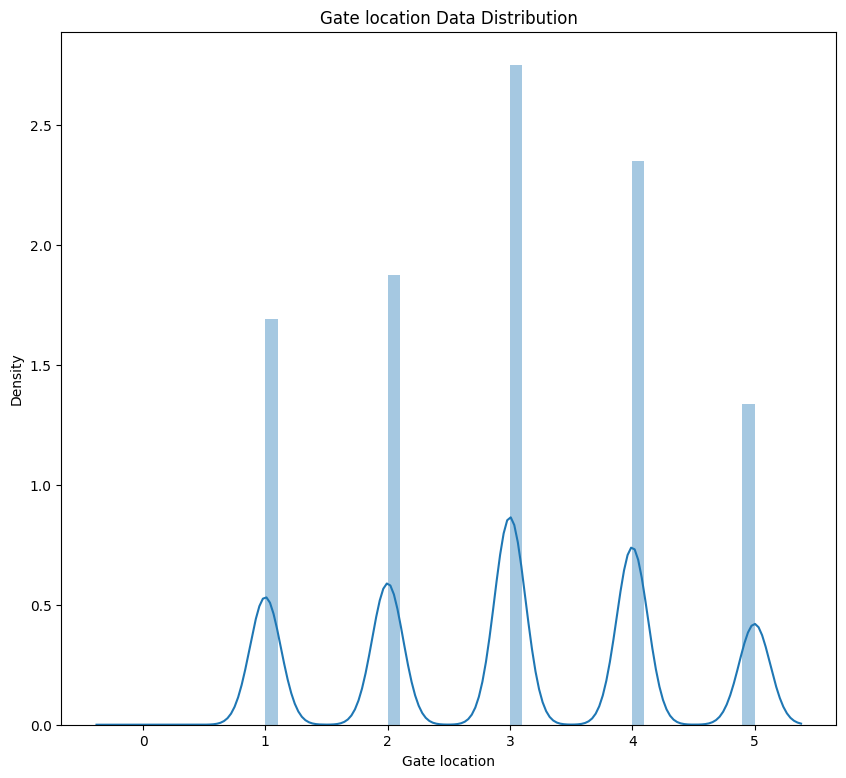

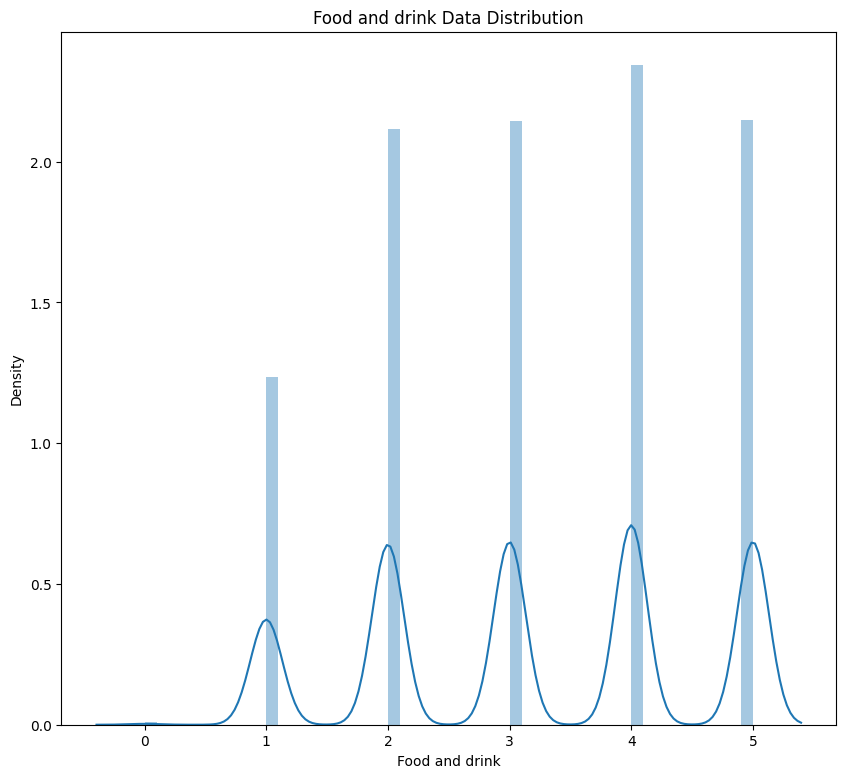

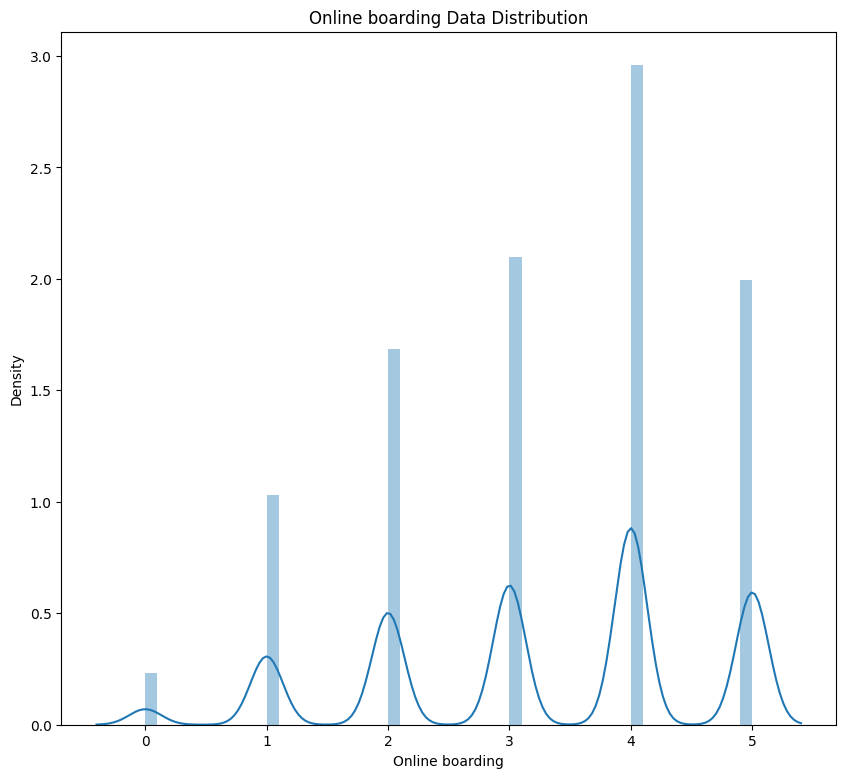

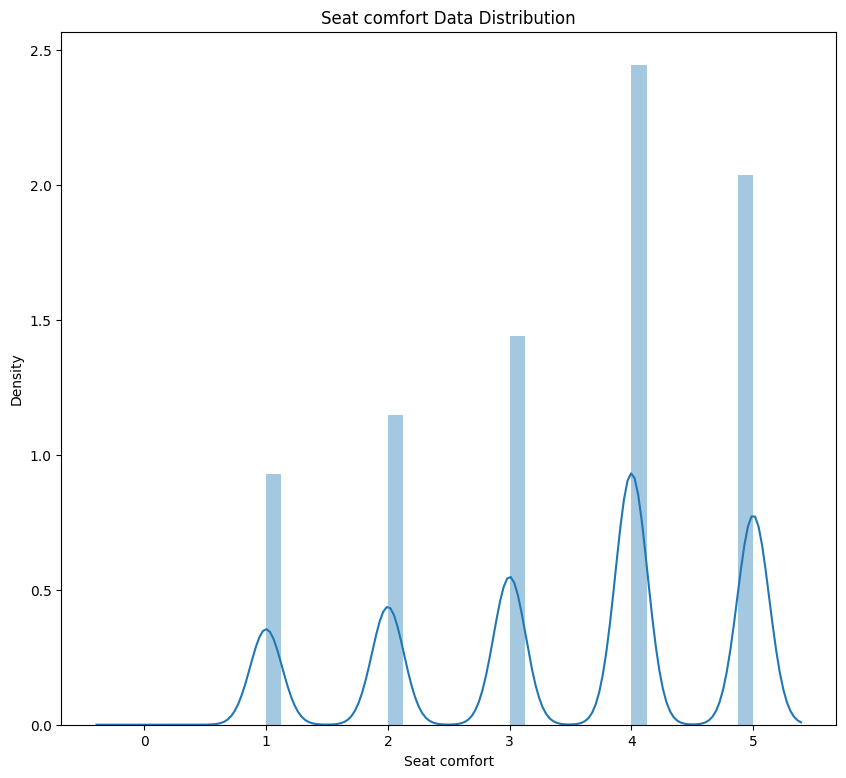

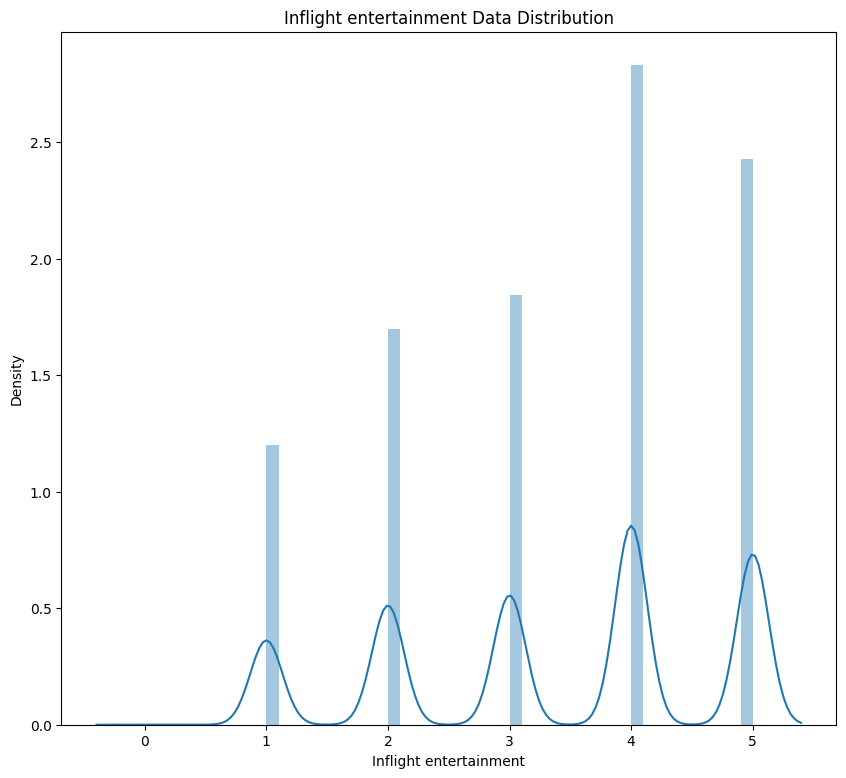

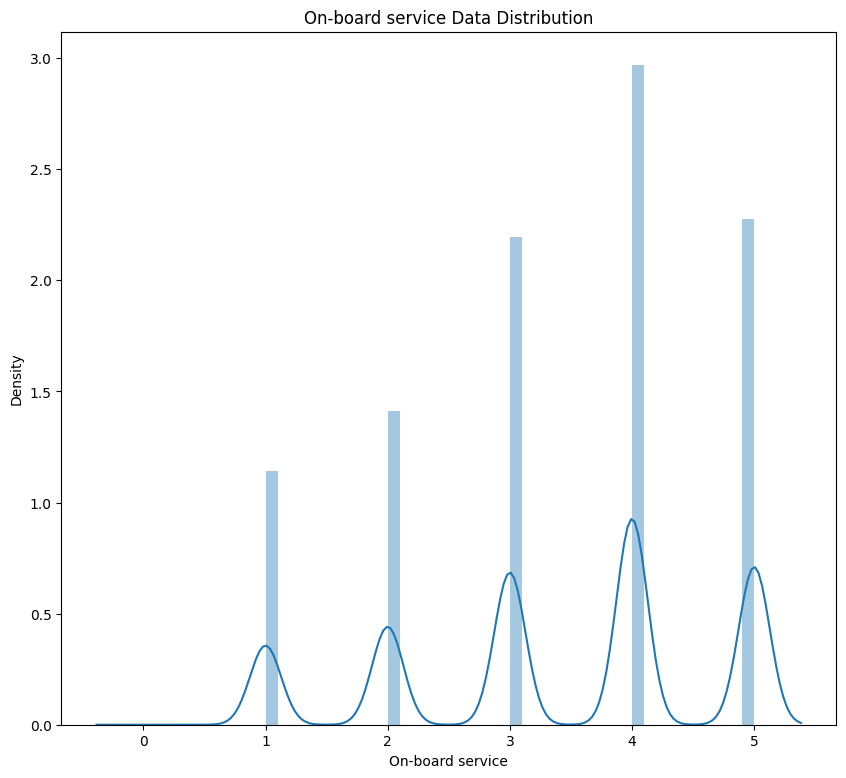

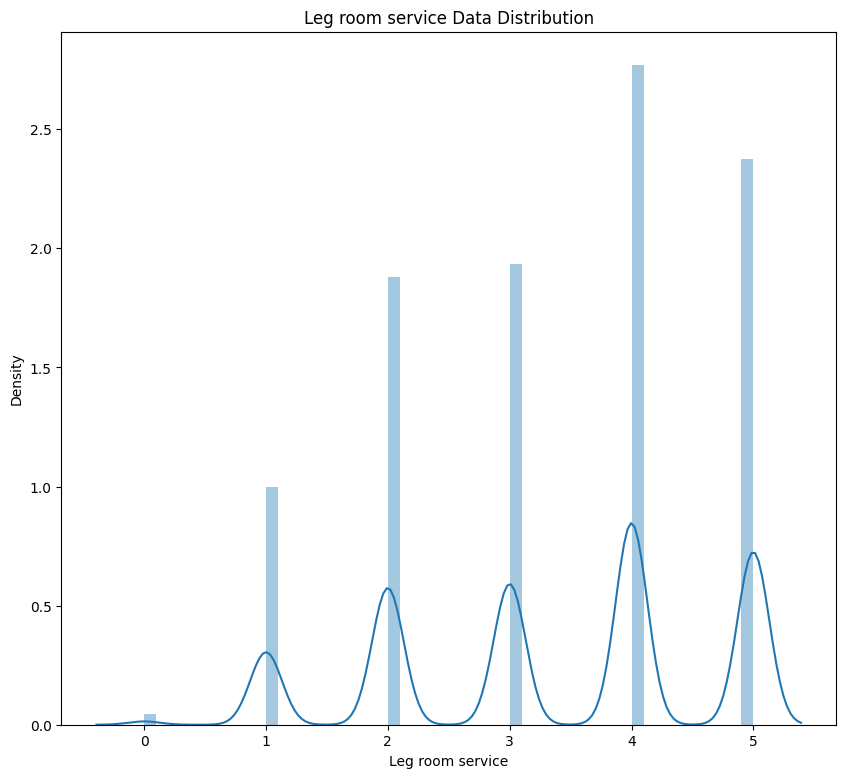

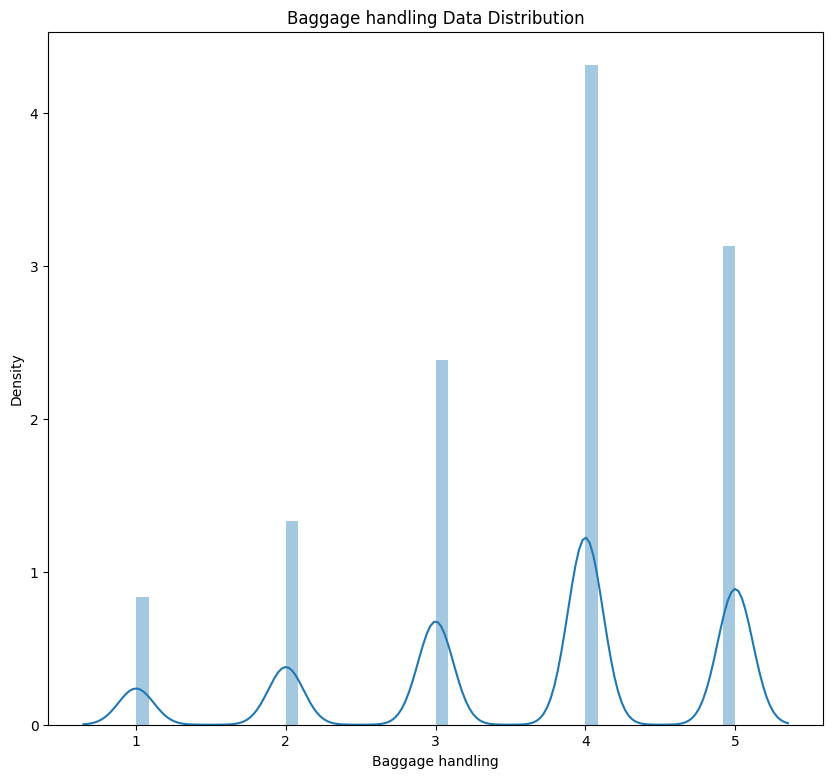

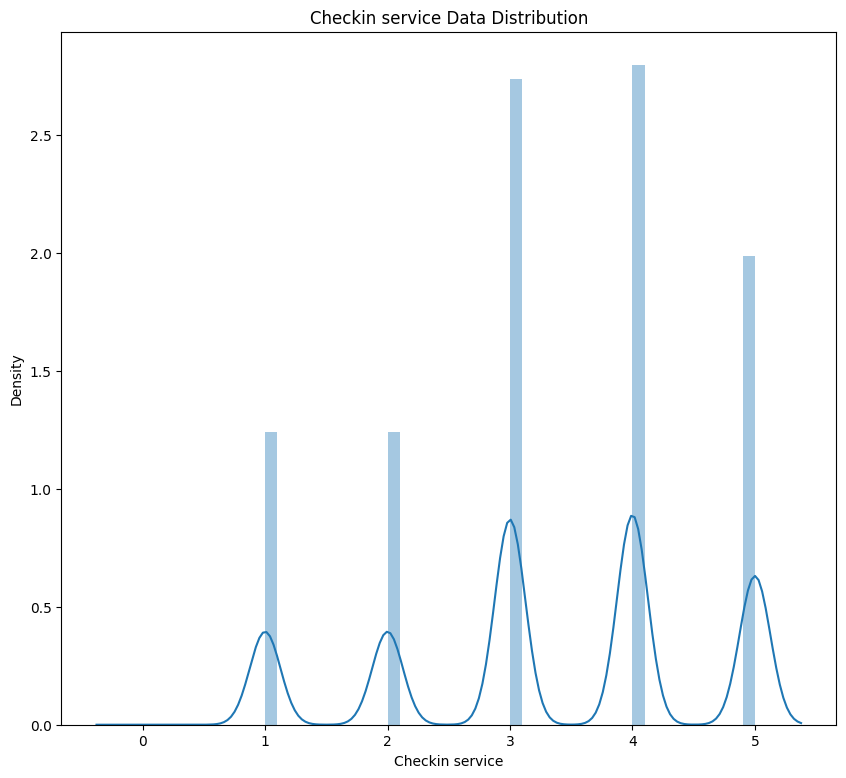

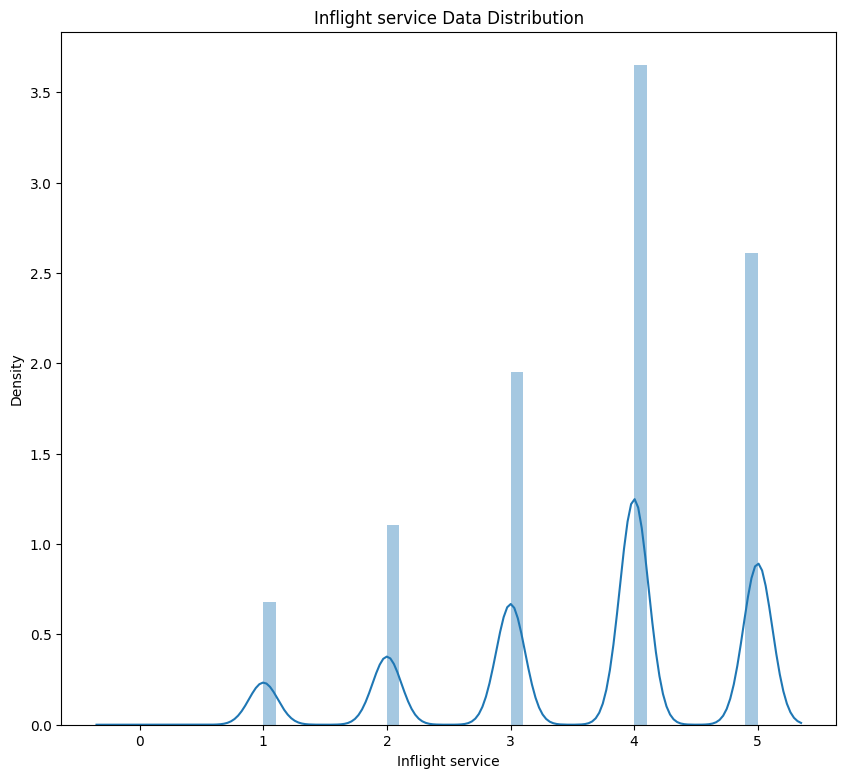

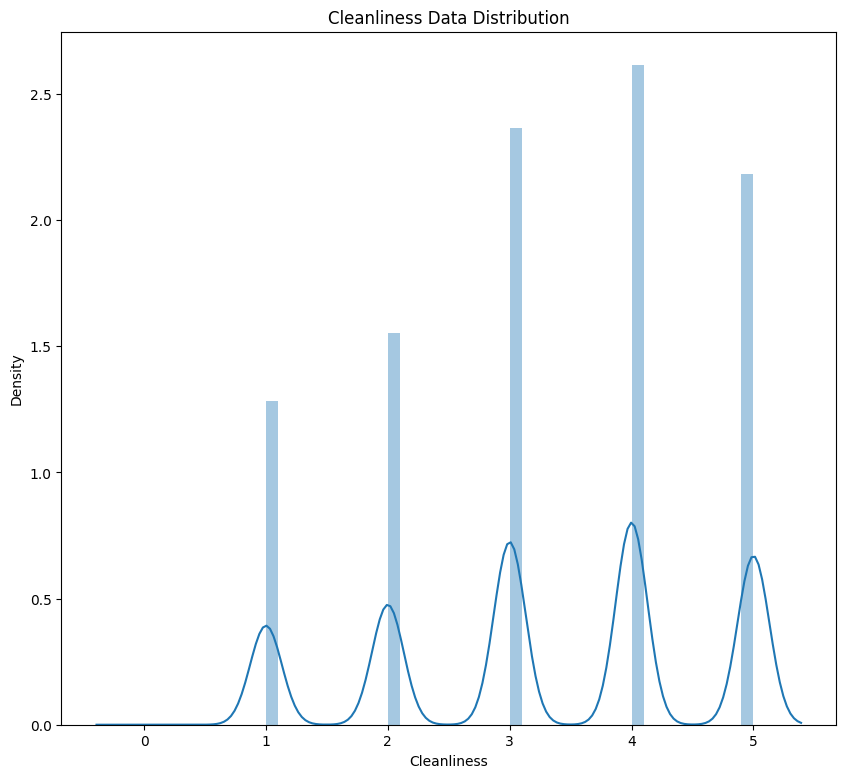

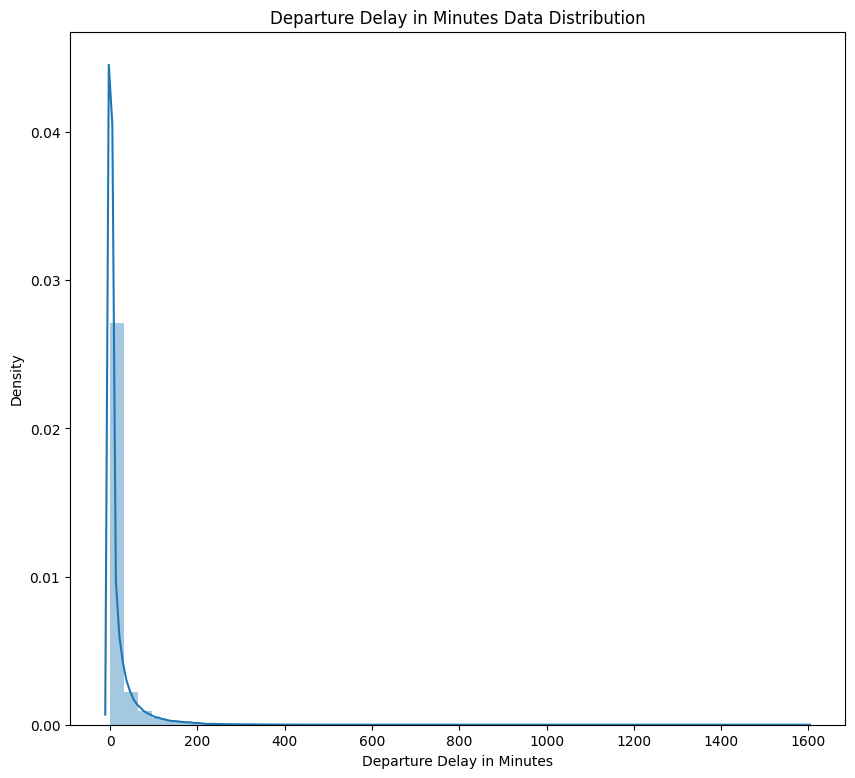

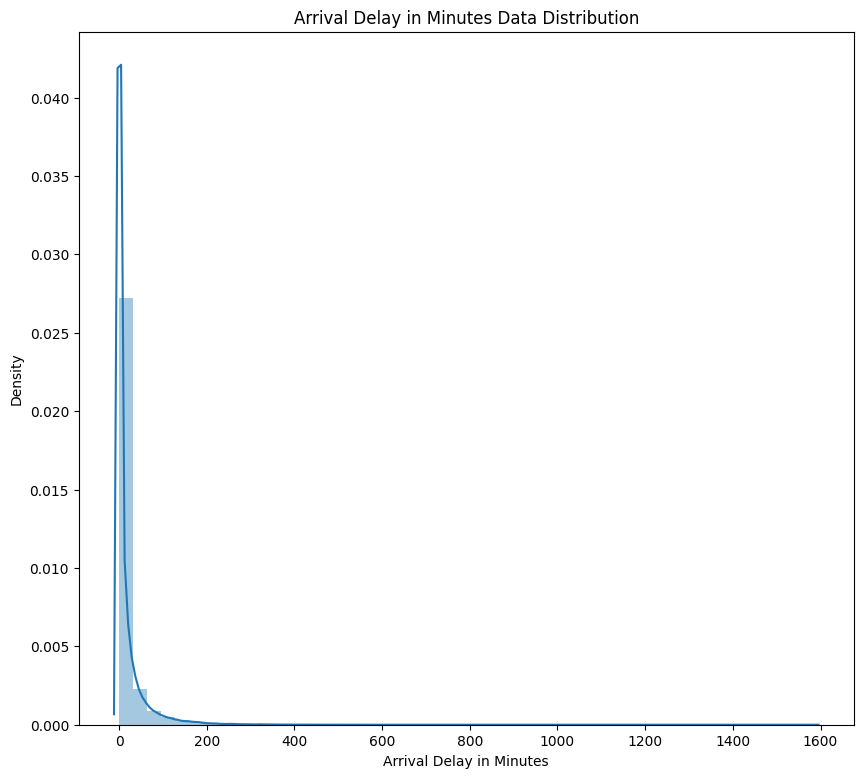

In [257]:
for num_col in NUM_COLS:
    distribution_plot(num_col)

- Ternyata setelah dilakukan EDA, ada beberapa data yang numerical itu aslinya masuk ke dalam kategori categorical. Karena dia bentuknya rating gitu. Sehingga perlu di proses kan lagi
- Udah coba ngelakuin Pairplot tapi gak bisa, terlalu lama. udah coba di sampling tetep lemot

### Betulkan Data nya
agak repot tapi yaudahlah ya wkwk


#### Train Data 

In [258]:
X_train_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [259]:
FILTERED_COLS = ["Age", "Flight Distance",
                "Departure Delay in Minutes", 
                "Arrival Delay in Minutes"]

In [260]:
tmp_data_train = X_train_num[FILTERED_COLS].copy()

In [261]:
X_train_num = X_train_num.drop(FILTERED_COLS, axis=1).copy()

In [262]:
X_train_cat = pd.concat([X_train_cat, X_train_num], axis = 1)

In [263]:
X_train_cat.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [264]:
X_train_num = tmp_data_train

In [265]:
X_train_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


#### Test Data 

In [266]:
tmp_data_test = X_test_num[FILTERED_COLS].copy()

In [267]:
X_test_num = X_test_num.drop(FILTERED_COLS, axis=1).copy()

In [268]:
X_test_cat = pd.concat([X_test_cat, X_test_num], axis = 1)

In [269]:
X_test_cat.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Female,Loyal Customer,Business travel,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,Female,Loyal Customer,Business travel,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,Male,disloyal Customer,Business travel,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,Male,Loyal Customer,Business travel,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,Female,Loyal Customer,Business travel,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [270]:
X_test_num = tmp_data_test

In [271]:
X_test_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,50,44.0
1,36,2863,0,0.0
2,20,192,0,0.0
3,44,3377,0,6.0
4,49,1182,0,20.0


### Preprocessing 

#### Handling Null Values with Mean 

In [272]:
X_train_num["Arrival Delay in Minutes"][X_train_num["Arrival Delay in Minutes"].isnull() == True]

213      NaN
1124     NaN
1529     NaN
2004     NaN
2108     NaN
          ..
102067   NaN
102384   NaN
102552   NaN
102960   NaN
103540   NaN
Name: Arrival Delay in Minutes, Length: 310, dtype: float64

In [273]:
X_train_num.iloc[213]

Age                            38.0
Flight Distance               109.0
Departure Delay in Minutes     31.0
Arrival Delay in Minutes        NaN
Name: 213, dtype: float64

In [274]:
mean_value = round(np.mean(X_train_num["Arrival Delay in Minutes"]), 0)

In [275]:
tst = X_train_num.copy()

In [276]:
tst.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


In [277]:
X_train_num['Arrival Delay in Minutes'] = X_train_num['Arrival Delay in Minutes'].fillna(np.median(X_train_num['Arrival Delay in Minutes']))

In [278]:
X_train_num.isnull().sum()

Age                             0
Flight Distance                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [279]:
X_test_num['Arrival Delay in Minutes'] = X_test_num['Arrival Delay in Minutes'].fillna(np.median(X_train_num['Arrival Delay in Minutes']))

In [280]:
X_test_num.isnull().sum()

Age                            0
Flight Distance                0
Departure Delay in Minutes     0
Arrival Delay in Minutes      83
dtype: int64

#### One Hot Encoding 

In [281]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Inflight wifi service              103904 non-null  int64 
 5   Departure/Arrival time convenient  103904 non-null  int64 
 6   Ease of Online booking             103904 non-null  int64 
 7   Gate location                      103904 non-null  int64 
 8   Food and drink                     103904 non-null  int64 
 9   Online boarding                    103904 non-null  int64 
 10  Seat comfort                       103904 non-null  int64 
 11  Inflight entertainment             103904 non-null  

In [201]:
X_train_cat["Inflight wifi service"].astype("object")

0         3
1         3
2         2
3         2
4         3
         ..
103899    2
103900    4
103901    1
103902    1
103903    1
Name: Inflight wifi service, Length: 103904, dtype: object

In [208]:
columns_list = X_train_cat.select_dtypes(include=np.number).columns.to_list()

In [209]:
columns_list

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [211]:
for cols in columns_list:
    X_train_cat[cols] = X_train_cat[cols].astype("object")

In [212]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Inflight wifi service              103904 non-null  object
 5   Departure/Arrival time convenient  103904 non-null  object
 6   Ease of Online booking             103904 non-null  object
 7   Gate location                      103904 non-null  object
 8   Food and drink                     103904 non-null  object
 9   Online boarding                    103904 non-null  object
 10  Seat comfort                       103904 non-null  object
 11  Inflight entertainment             103904 non-null  

### Perlukah kita encode yang data "rating" ini?

In [213]:
malas = pd.get_dummies(X_train_cat)

In [215]:
malas.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### One Hot Encoder

In [282]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [283]:
def fit_OHE(data):
    ohe_encoder = OneHotEncoder(handle_unknown="ignore")
    ohe_encoder.fit(data)
    
    return ohe_encoder

In [284]:
def transform_OHE(data, ohe_encoder):
    ohe_col = ohe_encoder.get_feature_names_out(data.columns)
    
    data_ohe = ohe_encoder.transform(data).toarray()
    data_ohe = pd.DataFrame(data = data_ohe,
                            columns = ohe_col,
                            index = data.index)
    
    return data_ohe, ohe_col

In [285]:
ohe_encoder = fit_OHE(data = X_train_cat)

In [286]:
X_train_cat_ohe, ohe_col = transform_OHE(data = X_train_cat,
                                         ohe_encoder = ohe_encoder)

X_test_cat_ohe, ohe_col = transform_OHE(data = X_test_cat,
                                        ohe_encoder = ohe_encoder)

In [288]:
X_train_cat_ohe.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# TODO BESOK: LANJUTIN CODE NYA 